# Demo - VizDoom : Basic Map

In [1]:
!pip install vizdoom

### Get dependencies

In [4]:
#import vizoom for game environment
from vizdoom import *

# Import rand
import random

# Import time for sleeping
import time

# Import for identity matrix
import numpy as np

### Create OpenAI Gym Environment

In [5]:
!pip install gym

In [6]:
# Import env base class from openAI gym
from gym import Env

# Import gym spaces
from gym.spaces import Discrete, Box

# Import opencv
import cv2

In [7]:
# Create vizdoom OpenAI Gym Environment
class VizDoomGym(Env):
    # function that is called at start of env
    def __init__(self, render=False):
        # Inherit from Env
        super().__init__()
        self.game = DoomGame()
        self.game.load_config('../../s22-team5-project/env/basic.cfg')
        
        # Choose whether or not to render each frame
        self.game.set_window_visible(render)
        self.game.init()
        
        # Create the obsv and action space
        self.observation_space = Box(low=0, high=255, 
                                     shape=(100,160,1), 
                                     dtype=np.uint8)
        self.action_space = Discrete(np.identity(3, dtype=np.uint8).shape[0])
    
    # How we take a step in the env
    def step(self, action):
        # Specify action and take step
        actions = np.identity(3, dtype=np.uint8)
        reward = self.game.make_action(actions[action], 1)
        
        # Get the other stuff
        if self.game.get_state():
            state = self.game.get_state().screen_buffer
            state = self.grayscale(state)
            ammo = self.game.get_state().game_variables[0]
        else:
            state = np.zeros(self.observation_space.shape)
            ammo = 0
        
        info = {"ammo":ammo}
        done = self.game.is_episode_finished()
        
        return state, reward, done, info
    
    # Predefined in Vizdoom, how to render the game
    def render():
        pass
    
    # What happens when we start a new game
    def reset(self):
        self.game.new_episode()
        state = self.game.get_state().screen_buffer
        return self.grayscale(state)
    
    # Grayscale the frame and resize
    def grayscale(self, observation):
        # moves the color channels to the end of the shape
        gray = cv2.cvtColor(np.moveaxis(observation, 0, -1), cv2.COLOR_BGR2GRAY) 
        resize = cv2.resize(gray, (160,100), interpolation=cv2.INTER_CUBIC)
        state = np.reshape(resize, (100,160,1))
        return state
        
    # Call to close down the game
    def close(self):
        self.game.close()

### View environment that the model was trained on
Need matplot in order to see the grayscaled frames

In [8]:
!pip install matplotlib

In [9]:
from matplotlib import pyplot as plt

In [10]:
env = VizDoomGym()

In [12]:
state = env.reset()

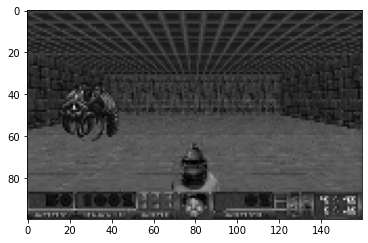

In [13]:
plt.imshow(cv2.cvtColor(state, cv2.COLOR_BGR2RGB))

In [15]:
env.close()

In [16]:
# Import ppo for training (RLA)
from stable_baselines3 import PPO

### Watch the Model

In [17]:
# Import eval policy to test agent
from stable_baselines3.common.evaluation import evaluate_policy

#### Model after 10,000 timesteps of training

In [42]:
# Load model from disk
model = PPO.load('../Demos/basic_model_10000')

In [43]:
env = VizDoomGym(render=True)

In [44]:
for episode in range(3):
    obs = env.reset()
    done = False
    total_reward = 0
    while not done:
        action, _ = model.predict(obs)
        obs, reward, done, info = env.step(action)
        time.sleep(0.03)
        total_reward += reward
    print('Total reward for episode {} is {}'.format(episode, total_reward))
    time.sleep(2)

Total reward for episode 0 is 22.0
Total reward for episode 1 is 94.0
Total reward for episode 2 is 67.0


In [45]:
env.close()

#### Model after 100,000 timesteps of training

In [46]:
# Load model from disk
model = PPO.load('../Demos/basic_model_100000')

In [47]:
env = VizDoomGym(render=True)

In [49]:
for episode in range(3):
    obs = env.reset()
    done = False
    total_reward = 0
    while not done:
        action, _ = model.predict(obs)
        obs, reward, done, info = env.step(action)
        time.sleep(0.05)
        total_reward += reward
    print('Total reward for episode {} is {}'.format(episode, total_reward))
    time.sleep(2)

Total reward for episode 0 is 92.0
Total reward for episode 1 is 72.0
Total reward for episode 2 is 72.0


In [50]:
env.close()